In [1]:
import pandas as pd

data_path = 'E:/GSU_Study/COURSE_SCHEDULE\Spring/Deep Learning/Assignment-3/UniversalBank.csv'
bank_data = pd.read_csv(data_path)

bank_data.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [2]:
# Check for missing values
missing_values = bank_data.isnull().sum()

missing_values


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [3]:
summary_statistics = bank_data.describe()

summary_statistics

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
bank_data['Experience'] = bank_data['Experience'].abs()

bank_data['Age Category'] = pd.cut(bank_data['Age'], bins=[0, 35, 55, float('inf')], labels=['Young', 'Middle-Aged', 'Senior'])
bank_data['Income Category'] = pd.cut(bank_data['Income'], bins=[-1, 50, 100, float('inf')], labels=['Low', 'Medium', 'High'])

modified_summary = bank_data.describe(include='all')

modified_data_head = bank_data.head()



In [5]:
 modified_data_head

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age Category,Income Category
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Young,Low
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Middle-Aged,Low
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Middle-Aged,Low
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,Young,Medium
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Young,Low


## TASK: would be to classify whether a customer accepting a personal loan & credit cards offered by the bank. 

In [7]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
import numpy as np


feature_columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
categorical_features = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

X = bank_data[feature_columns]
y = bank_data['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4000, 11)
X_test shape: (1000, 11)
y_train shape: (4000,)
y_test shape: (1000,)


In [7]:
y_train.value_counts()

Personal Loan
0    3625
1     375
Name: count, dtype: int64

In [7]:
from sklearn.utils import resample


train_data = pd.concat([X_train, y_train], axis=1)

majority = train_data[train_data['Personal Loan'] == 0]
minority = train_data[train_data['Personal Loan'] == 1]

minority_upsampled = resample(minority,
                              replace=True,     # sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=42) # reproducible results

upsampled = pd.concat([majority, minority_upsampled])

X_train_upsampled = upsampled.drop('Personal Loan', axis=1)
y_train_upsampled = upsampled['Personal Loan']



In [8]:
y_train_upsampled_counts = y_train_upsampled.value_counts()

y_train_upsampled_counts

Personal Loan
0    3625
1    3625
Name: count, dtype: int64

In [9]:
print("X_train shape:", X_train_upsampled.shape)
print("y_train shape:", y_train_upsampled.shape)


X_train shape: (7250, 11)
y_train shape: (7250,)


In [10]:
X_train_upsampled_processed = preprocessor.transform(X_train_upsampled)
X_train_upsampled_processed_reshaped = X_train_upsampled_processed.reshape((X_train_upsampled_processed.shape[0], X_train_upsampled_processed.shape[1], 1))
y_train_upsampled_cat = to_categorical(y_train_upsampled)
X_test_processed_reshaped = X_test_processed.reshape((X_test_processed.shape[0], X_test_processed.shape[1], 1))



In [11]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_upsampled_processed_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')  # 2 units for binary classification with one-hot encoding
])


C:\Users\saipr\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
model.fit(X_train_upsampled_processed_reshaped, y_train_upsampled_cat, epochs=50, validation_data=(X_test_processed_reshaped, y_test_cat), verbose=2)


Epoch 1/50
227/227 - 4s - 19ms/step - accuracy: 0.8903 - loss: 0.2833 - val_accuracy: 0.9070 - val_loss: 0.1904
Epoch 2/50
227/227 - 1s - 5ms/step - accuracy: 0.9379 - loss: 0.1649 - val_accuracy: 0.9580 - val_loss: 0.0981
Epoch 3/50
227/227 - 1s - 4ms/step - accuracy: 0.9589 - loss: 0.1171 - val_accuracy: 0.9720 - val_loss: 0.0826
Epoch 4/50
227/227 - 1s - 4ms/step - accuracy: 0.9647 - loss: 0.0972 - val_accuracy: 0.9560 - val_loss: 0.0989
Epoch 5/50
227/227 - 1s - 6ms/step - accuracy: 0.9686 - loss: 0.0832 - val_accuracy: 0.9870 - val_loss: 0.0455
Epoch 6/50
227/227 - 1s - 5ms/step - accuracy: 0.9705 - loss: 0.0768 - val_accuracy: 0.9500 - val_loss: 0.1157
Epoch 7/50
227/227 - 1s - 6ms/step - accuracy: 0.9703 - loss: 0.0715 - val_accuracy: 0.9850 - val_loss: 0.0428
Epoch 8/50
227/227 - 1s - 6ms/step - accuracy: 0.9742 - loss: 0.0662 - val_accuracy: 0.9720 - val_loss: 0.0666
Epoch 9/50
227/227 - 1s - 6ms/step - accuracy: 0.9782 - loss: 0.0624 - val_accuracy: 0.9810 - val_loss: 0.0474


In [14]:
test_loss, test_accuracy = model.evaluate(X_test_processed_reshaped, y_test_cat, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


32/32 - 0s - 7ms/step - accuracy: 0.9890 - loss: 0.0414
Test Accuracy: 98.90%


In [15]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical
import numpy as np

X_processed = np.concatenate((X_train_upsampled_processed_reshaped, X_test_processed_reshaped))
y_cat = to_categorical(np.concatenate((y_train_upsampled, y_test)))



In [18]:
import pandas as pd

scores_list = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
for train_index, test_index in kf.split(X_processed):
    X_train_fold, X_test_fold = X_processed[train_index], X_processed[test_index]
    y_train_fold, y_test_fold = y_cat[train_index], y_cat[test_index]
    
    model = Sequential([
        Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_fold.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(2, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    print(f'Training for fold {fold_no}...')
    model.fit(X_train_fold, y_train_fold, epochs=50, verbose=2)
    
    scores = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    scores_list.append((fold_no, scores[0], scores[1]*100))
    
    fold_no += 1

# Convert the scores list to a DataFrame
scores_df = pd.DataFrame(scores_list, columns=['Fold', 'Loss', 'Accuracy'])



Training for fold 1...
Epoch 1/50
207/207 - 3s - 16ms/step - accuracy: 0.9055 - loss: 0.2493
Epoch 2/50
207/207 - 1s - 5ms/step - accuracy: 0.9530 - loss: 0.1330
Epoch 3/50
207/207 - 1s - 6ms/step - accuracy: 0.9638 - loss: 0.1022
Epoch 4/50
207/207 - 1s - 7ms/step - accuracy: 0.9653 - loss: 0.0911
Epoch 5/50
207/207 - 1s - 7ms/step - accuracy: 0.9694 - loss: 0.0801
Epoch 6/50
207/207 - 1s - 7ms/step - accuracy: 0.9679 - loss: 0.0788
Epoch 7/50
207/207 - 2s - 8ms/step - accuracy: 0.9692 - loss: 0.0778
Epoch 8/50
207/207 - 1s - 6ms/step - accuracy: 0.9708 - loss: 0.0684
Epoch 9/50
207/207 - 2s - 7ms/step - accuracy: 0.9767 - loss: 0.0646
Epoch 10/50
207/207 - 2s - 8ms/step - accuracy: 0.9753 - loss: 0.0605
Epoch 11/50
207/207 - 1s - 7ms/step - accuracy: 0.9805 - loss: 0.0541
Epoch 12/50
207/207 - 1s - 6ms/step - accuracy: 0.9821 - loss: 0.0512
Epoch 13/50
207/207 - 1s - 7ms/step - accuracy: 0.9811 - loss: 0.0496
Epoch 14/50
207/207 - 1s - 7ms/step - accuracy: 0.9821 - loss: 0.0471
Epoch

In [19]:
print(scores_df)


   Fold      Loss   Accuracy
0     1  0.030320  99.272728
1     2  0.028150  99.090910
2     3  0.034863  99.090910
3     4  0.023132  99.151516
4     5  0.030094  99.272728


In [21]:
test_prediction = model.predict(X_train_upsampled_processed_reshaped[:1])
print(test_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
[[0.9729687  0.02703135]]


In [16]:
def evaluate_model(model, X, y):
    loss, accuracy = model.evaluate(X, y, verbose=0)
    return accuracy


In [17]:
original_accuracy1 = evaluate_model(model, X_test_processed_reshaped, y_test_cat)


In [22]:
def permutation_importance(model, X_data, y_data, feature_names, preprocessor, original_accuracy1):
    importances = {}
    for feature in feature_names:
        X_temp = X_data.copy()
        X_temp[feature] = np.random.permutation(X_temp[feature])
        X_temp_processed = preprocessor.transform(X_temp)
        X_temp_reshaped = X_temp_processed.reshape((X_temp_processed.shape[0], X_temp_processed.shape[1], 1))
        
        temp_accuracy = evaluate_model(model, X_temp_reshaped, to_categorical(y_data))
        
        importances[feature] = original_accuracy1 - temp_accuracy
    
    return importances


In [23]:
feature_importances = permutation_importance(model, X, y, feature_columns, preprocessor, original_accuracy1)
for feature, importance in sorted(feature_importances.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Income: 0.1760
Education: 0.0802
Family: 0.0678
CCAvg: 0.0162
Experience: 0.0070
Age: 0.0042
CD Account: 0.0012
CreditCard: -0.0016
Online: -0.0024
Mortgage: -0.0026
Securities Account: -0.0050


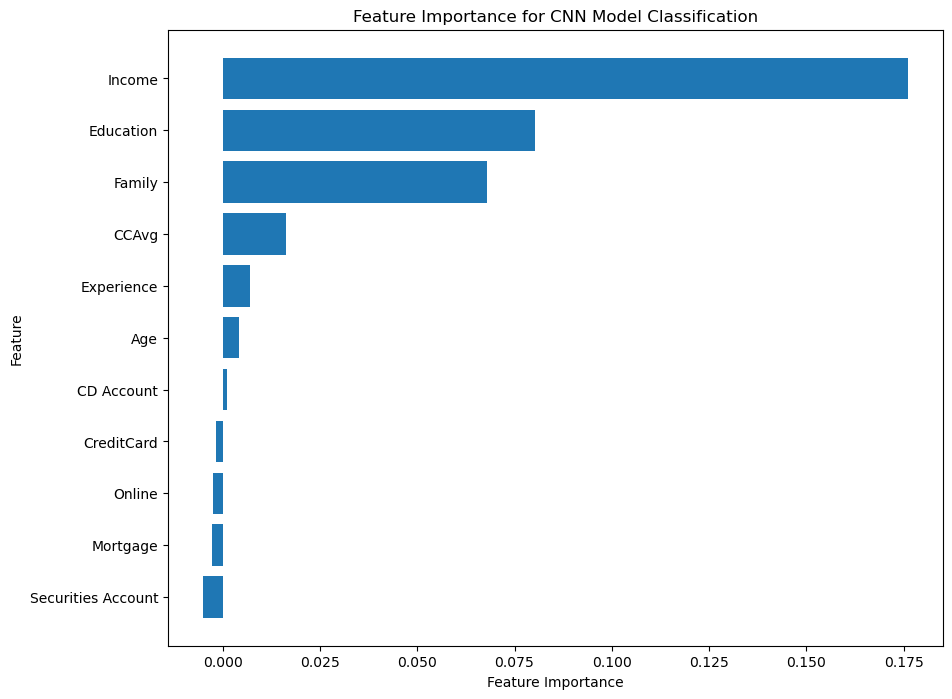

In [24]:
import matplotlib.pyplot as plt
import numpy as np

sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

features, importances = zip(*sorted_features)

plt.figure(figsize=(10, 8))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for CNN Model Classification')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


##For Credit Cards

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.utils import to_categorical

feature_columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'Personal Loan']
categorical_features = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'Personal Loan']
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

X = bank_data[feature_columns]
y = bank_data['CreditCard']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

X_train_reshaped = X_train_processed.reshape((X_train_processed.shape[0], X_train_processed.shape[1], 1))
X_test_reshaped = X_test_processed.reshape((X_test_processed.shape[0], X_test_processed.shape[1], 1))

X_train_reshaped.shape, X_test_reshaped.shape, y_train_cat.shape, y_test_cat.shape


((4000, 20, 1), (1000, 20, 1), (4000, 2), (1000, 2))

In [26]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])


C:\Users\saipr\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [28]:
model.fit(X_train_reshaped, y_train_cat, epochs=50, validation_data=(X_test_reshaped, y_test_cat), verbose=2)


Epoch 1/50
125/125 - 4s - 32ms/step - accuracy: 0.7000 - loss: 0.6063 - val_accuracy: 0.7080 - val_loss: 0.5867
Epoch 2/50
125/125 - 1s - 5ms/step - accuracy: 0.7240 - loss: 0.5815 - val_accuracy: 0.7410 - val_loss: 0.5692
Epoch 3/50
125/125 - 1s - 5ms/step - accuracy: 0.7295 - loss: 0.5761 - val_accuracy: 0.7470 - val_loss: 0.5662
Epoch 4/50
125/125 - 1s - 6ms/step - accuracy: 0.7400 - loss: 0.5632 - val_accuracy: 0.7490 - val_loss: 0.5550
Epoch 5/50
125/125 - 1s - 6ms/step - accuracy: 0.7430 - loss: 0.5561 - val_accuracy: 0.7490 - val_loss: 0.5552
Epoch 6/50
125/125 - 1s - 5ms/step - accuracy: 0.7420 - loss: 0.5571 - val_accuracy: 0.7490 - val_loss: 0.5509
Epoch 7/50
125/125 - 1s - 6ms/step - accuracy: 0.7420 - loss: 0.5543 - val_accuracy: 0.7490 - val_loss: 0.5570
Epoch 8/50
125/125 - 1s - 7ms/step - accuracy: 0.7430 - loss: 0.5550 - val_accuracy: 0.7490 - val_loss: 0.5525
Epoch 9/50
125/125 - 1s - 5ms/step - accuracy: 0.7427 - loss: 0.5518 - val_accuracy: 0.7490 - val_loss: 0.5556


In [34]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test_cat, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')


Test Accuracy: 75.30%


In [30]:
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy


In [35]:
def permutation_importance(model, X_data, y_data, feature_names, preprocessor, original_accuracy):
    importances = {}
    for feature in feature_names:
        X_temp = X_data.copy()
        X_temp[feature] = np.random.permutation(X_temp[feature])
        X_temp_processed = preprocessor.transform(X_temp)
        X_temp_reshaped = X_temp_processed.reshape((X_temp_processed.shape[0], X_temp_processed.shape[1], 1))
        
        temp_accuracy = evaluate_model(model, X_temp_reshaped, to_categorical(y_data))
        
        importances[feature] = original_accuracy - temp_accuracy
    
    return importances


In [36]:
original_accuracy = evaluate_model(model, X_test_reshaped, y_test_cat)
feature_importances = permutation_importance(model, X, y, feature_columns, preprocessor, original_accuracy)


In [37]:
for feature, importance in feature_importances.items():
    print(f"{feature}: {importance}")


Age: 0.00820004940032959
Experience: 0.007800042629241943
Income: 0.007400035858154297
Family: 0.007200002670288086
CCAvg: 0.007200002670288086
Education: 0.007600009441375732
Mortgage: 0.00700002908706665
Securities Account: 0.011800050735473633
CD Account: 0.07539999485015869
Online: 0.009000003337860107
Personal Loan: 0.012800037860870361


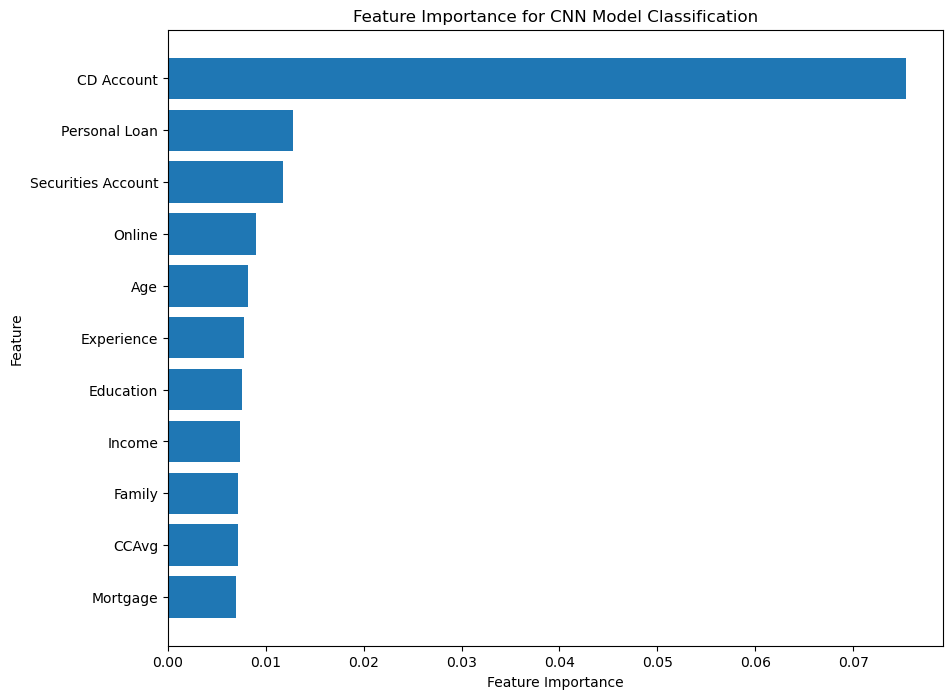

In [38]:
import matplotlib.pyplot as plt
import numpy as np

sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

features, importances = zip(*sorted_features)

plt.figure(figsize=(10, 8))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for CNN Model Classification')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()
